In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [3]:
df=pd.read_csv(r"/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
x = df.drop(columns = ['Outcome'])


In [9]:
y=df['Outcome']

In [11]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=15)

In [12]:
model=RandomForestClassifier()

In [13]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
trainscore=model.score(x_train,y_train)
testscore=model.score(x_test,y_test)

In [15]:
y_pred=model.predict(x_test)

In [16]:
f1score = f1_score(y_test, y_pred, average='weighted')

In [17]:
confusionmatrix=confusion_matrix(y_test, y_pred)

In [18]:
print(f1score)

0.7512416759156494


In [19]:
print(confusionmatrix)

[[109  20]
 [ 27  36]]


In [20]:
import joblib

# Save the model to a file with a .pkl extension
joblib.dump(model, 'diabetes.pkl')

['diabetes.pkl']

In [21]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
343,5,122,86,0,0,34.7,0.290,33
728,2,175,88,0,0,22.9,0.326,22
73,4,129,86,20,270,35.1,0.231,23
254,12,92,62,7,258,27.6,0.926,44
741,3,102,44,20,94,30.8,0.400,26
...,...,...,...,...,...,...,...,...
481,0,123,88,37,0,35.2,0.197,29
84,5,137,108,0,0,48.8,0.227,37
603,7,150,78,29,126,35.2,0.692,54
591,2,112,78,50,140,39.4,0.175,24


In [22]:
y_test

,Outcome
343,0
728,0
73,0
254,1
741,0
...,...
481,0
84,1
603,1
591,0


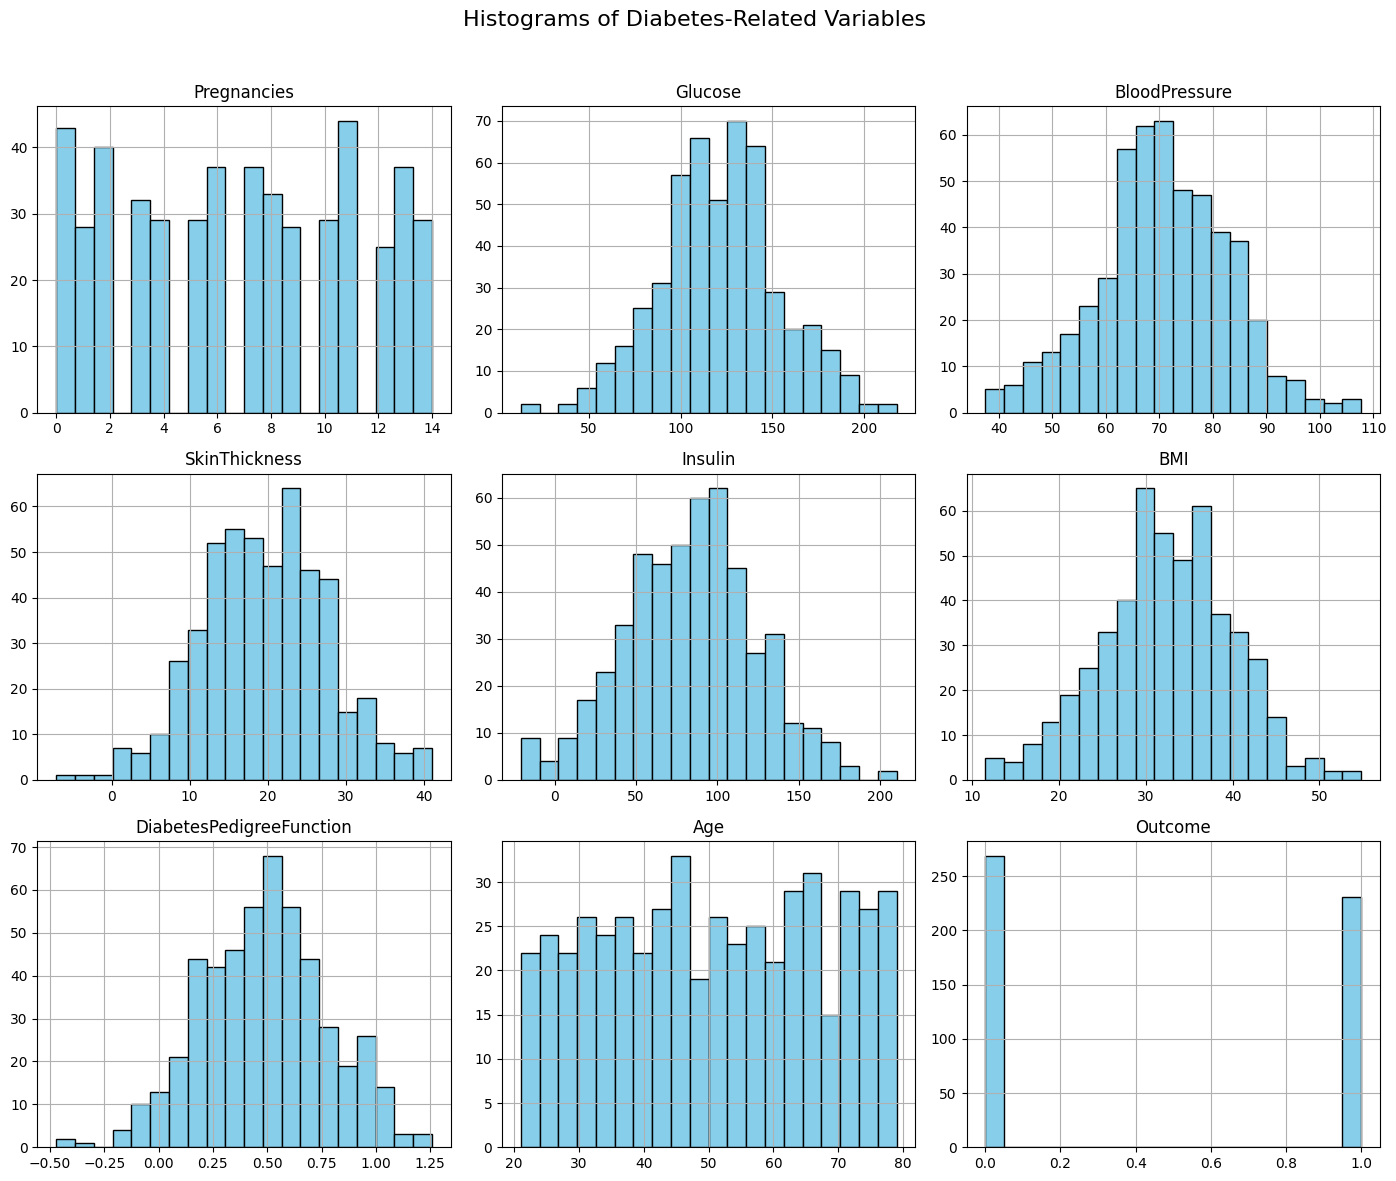

In [29]:
np.random.seed(42)

data = {
    'Pregnancies': np.random.randint(0, 15, 500),
    'Glucose': np.random.normal(120, 30, 500),
    'BloodPressure': np.random.normal(70, 12, 500),
    'SkinThickness': np.random.normal(20, 8, 500),
    'Insulin': np.random.normal(80, 40, 500),
    'BMI': np.random.normal(32, 7, 500),
    'DiabetesPedigreeFunction': np.random.normal(0.5, 0.3, 500),
    'Age': np.random.randint(21, 80, 500),
    'Outcome': np.random.randint(0, 2, 500)
}


df = pd.DataFrame(data)

df.hist(bins=20, figsize=(14, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Diabetes-Related Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [30]:
import joblib


model = joblib.load('diabetes.pkl')

input_values = [[12	,92	,62	,7,	258,	27.6	,0.926	,44]]
predictions = model.predict(input_values)

print("Predicted BMI class:", predictions)


Predicted BMI class: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# New Section